Загрузка данных из kaggle

In [7]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.1 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [10]:
import gdown
import os
from google.colab import files
from zipfile import ZipFile

In [11]:
def set_seed(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed()

In [12]:

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [13]:


!kaggle competitions download -c vk-made-sports-image-classification

100% 1.51G/1.51G [01:10<00:00, 26.2MB/s]
100% 1.51G/1.51G [01:10<00:00, 22.9MB/s]


In [14]:


with ZipFile("/content/vk-made-sports-image-classification.zip", "r") as zipobj:
     zipobj.extractall("sport_images")

In [15]:
os.mkdir('/content/sport_images/val')

In [16]:
import os, shutil
from pathlib import Path

In [17]:
SPLIT = 0.85
path = "/content/sport_images/train/"
imgs = os.listdir(path)
    
split_size = int(SPLIT*len(imgs))

In [18]:
train = pd.read_csv("//content/sport_images/train.csv")[:split_size]
validation = pd.read_csv("//content/sport_images/train.csv")[split_size:]
test = pd.read_csv("//content/sport_images/test.csv")

train.shape, validation.shape, test.shape

((38567, 2), (6806, 2), (19446, 1))

In [19]:
train["path"] = "/content/sport_images/train/" + train["image_id"]
test["path"] = "/content/sport_images/test/" + test["image_id"]
validation["path"] = "/content/sport_images/train/" + validation["image_id"]

In [20]:
train.head()

,image_id,label,path
0,46514481-2d8b-4d49-8991-012e1bfd34f6.jpeg,swimming,/content/sport_images/train/46514481-2d8b-4d49...
1,ec66e513-adac-4a30-b6a9-3d647ee6e46b.jpeg,greco-Roman_wrestling,/content/sport_images/train/ec66e513-adac-4a30...
2,4d60732e-d680-4bfd-9067-70ff8137f537.jpeg,running,/content/sport_images/train/4d60732e-d680-4bfd...
3,93327011-8e3d-4f0d-849d-a26ddaf6488b.jpeg,football,/content/sport_images/train/93327011-8e3d-4f0d...
4,b6853478-48c1-48b2-b104-74903730c831.jpeg,sailing,/content/sport_images/train/b6853478-48c1-48b2...


Исследуем данные

In [21]:
validation.head()

,image_id,label,path
38567,2a3385cf-6b6c-4d54-aea7-f9ddbd4a2552.jpeg,rugby,/content/sport_images/train/2a3385cf-6b6c-4d54...
38568,c8384a03-c980-4422-92e8-abca1f8fccf3.jpeg,sambo,/content/sport_images/train/c8384a03-c980-4422...
38569,874f9cc3-3cc7-4d14-82bb-12eeec40a3e0.jpeg,velo,/content/sport_images/train/874f9cc3-3cc7-4d14...
38570,6f3d927c-ccdc-4ddc-a2eb-28419b55ea4d.jpeg,rugby,/content/sport_images/train/6f3d927c-ccdc-4ddc...
38571,895d948d-e88f-4635-b4f6-2f791065a57e.jpeg,golf,/content/sport_images/train/895d948d-e88f-4635...


In [22]:

train.label.value_counts().to_frame

<bound method Series.to_frame of basketball               2158
football                 1832
hockey                   1817
rugby                    1709
running                  1684
skating                  1649
volleyball               1581
alpinism                 1554
boxing                   1530
tennis                   1490
boating                  1480
horseback_riding         1327
handball                 1285
surfing                  1212
fencing                  1210
gymnastics               1205
arm_wrestling            1184
golf                     1159
ski_race                 1140
greco-Roman_wrestling    1115
swimming                 1105
velo                     1050
sambo                    1047
sailing                   995
badminton                 954
taekwondo                 934
pole_vault                890
archery                   847
water_polo                724
javelin-throwing          700
Name: label, dtype: int64>

15795
860
38158
11284
6265
16850
37194
21962
16023
1685
769
2433
5311
37819
17568


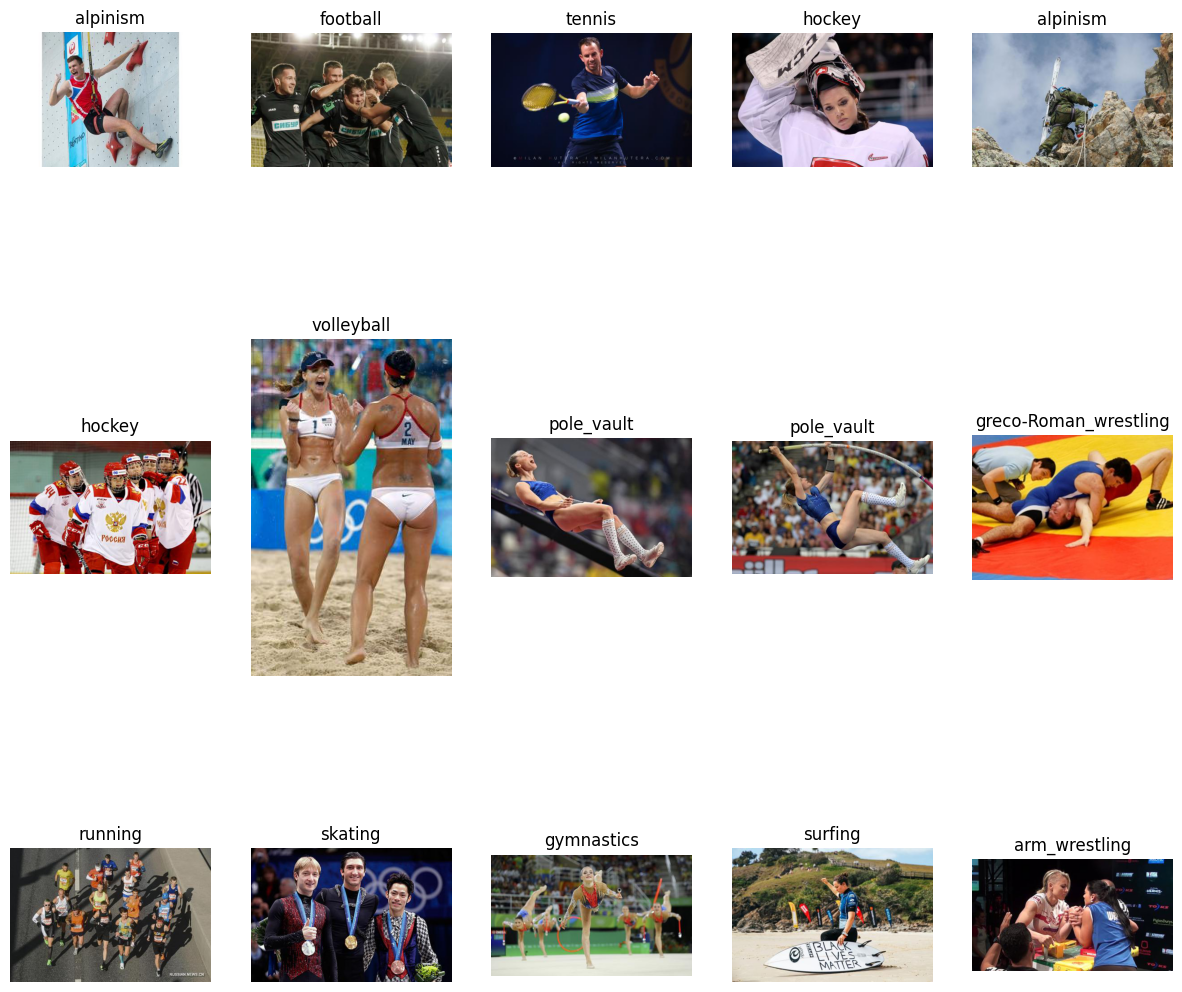

In [23]:
random_img = np.random.choice(len(train), 15)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i+1)
    img = random_img[i]
    print(img)
    my_img = plt.imread(train.path[img]) 
    plt.imshow(my_img) 
    plt.title(train.label[img])
    plt.axis("off")

Разделяем данные

In [24]:

LC = LabelEncoder() 
train["new_labels"] = LC.fit_transform(train.label)
# test["new_labels"] = LC.transform(test.label)
validation["new_labels"] = LC.transform(validation.label)

In [25]:
x_train, y_train = train.path, tf.keras.utils.to_categorical(train.new_labels)
x_val, y_val = validation.path, tf.keras.utils.to_categorical(validation.new_labels) 


test_img = test.path

In [26]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((38567,), (38567, 30), (6806,), (6806, 30))

In [27]:
BATCH_SIZE = 64
AUTO = tf.data.experimental.AUTOTUNE
IMG_SIZE = 440

In [28]:
# image test
@tf.function
def get_image(path):
    """Function loads image from a file and preprocesses it.
    :param path: Path to image file
    :return: Tensor with preprocessed image
    """
    image = tf.image.decode_jpeg(tf.io.read_file(path), channels=3)
    

    image = tf.cast(tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE), dtype=tf.int32)

    return image


@tf.function
def process_dataset(path, label):

    """Function returns preprocessed image and label.
    :param path: Path to image file
    :param label: Class label
    :return: tf.Tensor with preprocessed image, numeric label
    """
    return get_image(path), label

In [29]:

train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_ds = train_ds.map(process_dataset, num_parallel_calls=AUTO).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTO)

val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_ds = val_ds.map(process_dataset, num_parallel_calls=AUTO).batch(BATCH_SIZE).prefetch(AUTO)

test_ds = tf.data.Dataset.from_tensor_slices((test_img))
test_ds = test_ds.map(get_image, num_parallel_calls=AUTO).batch(BATCH_SIZE)

train_ds, val_ds, test_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 440, 440, 3), dtype=tf.int32, name=None), TensorSpec(shape=(None, 30), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 440, 440, 3), dtype=tf.int32, name=None), TensorSpec(shape=(None, 30), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=TensorSpec(shape=(None, 440, 440, 3), dtype=tf.int32, name=None)>)

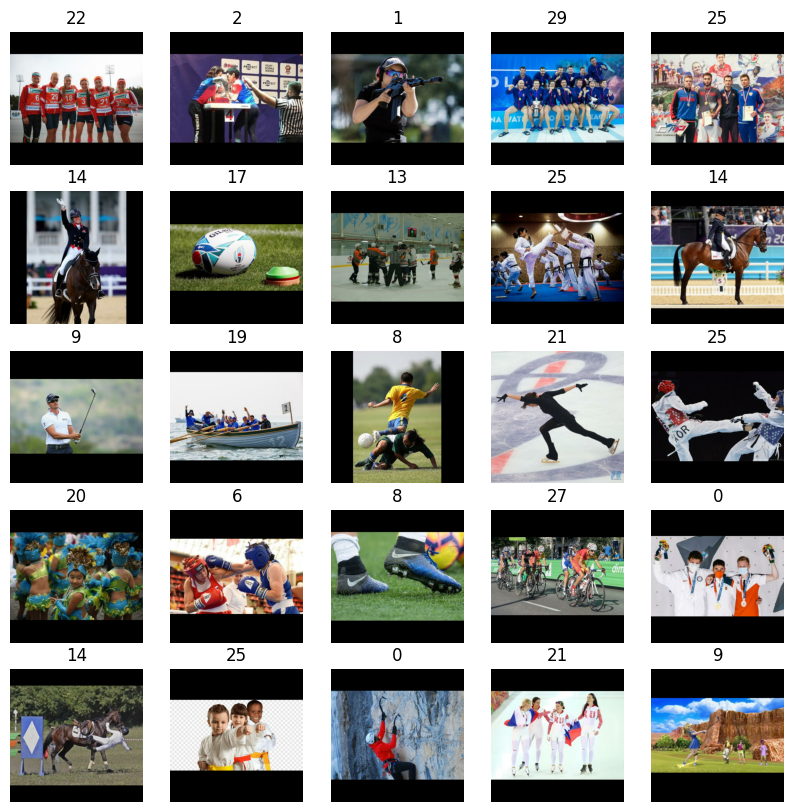

In [30]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n])
    plt.title(np.argmax(label_batch[n].numpy())) 
    plt.axis("off")

Устанавливаем параметры

In [33]:
EPOCHS = 1
INIT_LR = 2e-4
MAX_LR = 2e-3
Wd = 4e-4

steps_per_epoch =  len(x_train) // BATCH_SIZE

clr = tfa.optimizers.Triangular2CyclicalLearningRate(
    initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    step_size= 0.25 * steps_per_epoch
)

SGD = tf.keras.optimizers.SGD(learning_rate=clr, momentum=0.9)
SGDW = tfa.optimizers.SGDW(learning_rate=clr, momentum=0.9, weight_decay = Wd)


ADAM = tf.keras.optimizers.Adam(learning_rate=INIT_LR)
ADABELIEF = tfa.optimizers.AdaBelief(learning_rate = INIT_LR, weight_decay = Wd)
ADAMW = tfa.optimizers.AdamW(learning_rate = INIT_LR, weight_decay = Wd)

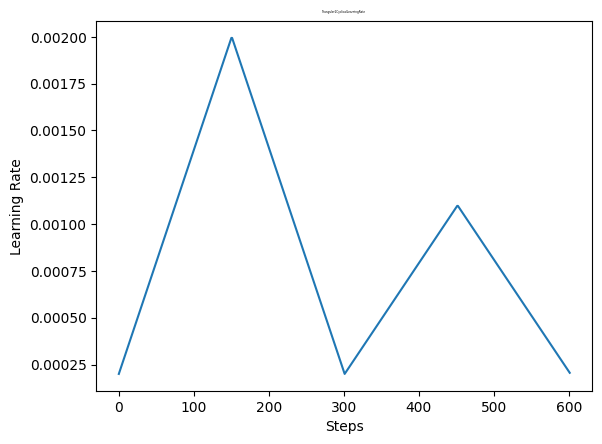

In [34]:
step = np.arange(0, EPOCHS * steps_per_epoch)
lr = clr(step)
plt.plot(step, lr)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.title("Triangular2CyclicalLearningRate", size=2)
plt.show()

## efficientnet

In [35]:
pip install -U keras-efficientnet-v2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import keras_efficientnet_v2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),    
    ],
    name="data_augmentation",
)

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

In [38]:

input = layers.Input(shape=(440, 440, 3)) 

 
x = data_augmentation(input)


Eff = keras_efficientnet_v2.EfficientNetV2B0(input_shape=(440,440,3),
                                             num_classes = 0,
                                             pretrained="imagenet",
                                             include_preprocessing = True)(x)

# add fc      
x_fc = layers.GlobalAveragePooling2D()(Eff)
x_fc = layers.LayerNormalization()(x_fc)
# x_fc = layers.Dense(200, activation='relu')(x_fc)
# x_fc = layers.GlobalAveragePooling2D()(x_fc)
# x_fc = layers.LayerNormalization()(x_fc)
# x_fc = layers.Dropout(0.2)(x_fc)
x_fc = layers.Dense(60, activation='relu')(x_fc)
x_fc = layers.Dropout(0.2)(x_fc)
output = layers.Dense(30, activation="softmax")(x_fc)

model = tf.keras.Model(inputs=input, outputs=output, name = "ConvNeXtTiny")

for layer in model.layers[2:3]:
    layer.trainable = False


model.compile(optimizer = ADAMW, #ADAMW, #SGDW,#ADABELIEF,#SGDW
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"]) 

model.summary()

29555872/29555872 [==============================] - 1s 0us/step
>>>> Load pretrained from: /root/.keras/models/efficientnetv2/efficientnetv2-b0-imagenet.h5
Model: "ConvNeXtTiny"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 440, 440, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 440, 440, 3)      0         
 al)                                                             
                                                                 
 EfficientNetV2B0 (Functiona  (None, 14, 14, 1280)     5919312   
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                             

In [ ]:
checkpoint_filepath = "/content/tmp/checkpoint"
 
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                                 monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')

# history = model.fit_generator(aug.flow(x_train,y_train, batch_size=BATCH_SIZE),
                              # validation_data=val_ds, steps_per_epoch=steps_per_epoch, 
                    # epochs=EPOCHS, callbacks = [cb_checkpt],verbose=1)
history = model.fit_generator(train_ds, validation_data=val_ds, steps_per_epoch=len(y_train) // BATCH_SIZE,
                    epochs=EPOCHS, callbacks = [cb_checkpt],verbose=1)

model.load_weights(checkpoint_filepath)

  4/602 [..............................] - ETA: 3:27:08 - loss: 3.9236 - accuracy: 0.0312

In [27]:
checkpoint_filepath = "/content/tmp/checkpoint"
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                                 monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')


In [28]:
model.load_weights(checkpoint_filepath)
history = model.fit_generator(train_ds, validation_data=val_ds, steps_per_epoch=len(y_train) // BATCH_SIZE,
                    epochs=EPOCHS, callbacks = [cb_checkpt],verbose=1)


602/602 [==============================] - 287s 441ms/step - loss: 0.4910 - accuracy: 0.8729 - val_loss: 0.4560 - val_accuracy: 0.8911


In [ ]:
model.load_weights(checkpoint_filepath)
history = model.fit_generator(train_ds, validation_data=val_ds, steps_per_epoch=len(y_train) // BATCH_SIZE,
                    epochs=EPOCHS, callbacks = [cb_checkpt],verbose=1)

113/602 [====>.........................] - ETA: 3:12 - loss: 0.6066 - accuracy: 0.8591

In [37]:
loss, accuracy, = model.evaluate(val_ds)
print(f"Val loss: {round(loss, 2)}")
print(f"Val accuracy: {round(accuracy * 100, 2)}%")

107/107 [==============================] - 32s 297ms/step - loss: 0.3789 - accuracy: 0.8976
Val loss: 0.38
Val accuracy: 89.76%


In [38]:
predict = model.predict(test_ds)
test2 = pd.DataFrame()
test2['image_id'] = test['image_id'].apply(lambda x: x.split('/')[-1])
test2['label'] = LC.inverse_transform(np.argmax(predict, axis=1))

304/304 [==============================] - 101s 322ms/step


In [41]:
test2.to_csv('submission.csv', index=False)

In [ ]:
! touch "/content/submission.csv"

In [ ]:
print(f"accuracy score test datasets: {accuracy_score(test.labels,LC.inverse_transform(np.argmax(predict, axis=1)))}% ")

accuracy score test datasets: 0.96% 


In [ ]:

#save model

model.save("best_sport.h5")

In [ ]:
# simpan ke file drive
!cp "/content/best_sport.h5" "/content/drive/MyDrive/swintransformertf"

## Mobile-Vit v2

In [ ]:
# referensj 

#https://github.com/avinash31d/paper-implementations

In [ ]:
patch_size = 4 
image_size = 256
image_size_large = 270
expansion_ratio = 2.0
num_classes = 30

In [ ]:
class InvertedRes(layers.Layer):
  def __init__(self, expand_channels, output_channels, strides=1):
    super().__init__()
    self.output_channels = output_channels
    self.strides = strides
    self.expand = tf.keras.models.Sequential([
                                          layers.Conv2D(expand_channels, 1, padding="same", use_bias=False),
                                          layers.BatchNormalization(),
                                          layers.Activation('swish')
                                        ], name="expand")
    self.dw_conv = tf.keras.models.Sequential([
                                          layers.DepthwiseConv2D(3, strides=strides, padding="same", use_bias=False),
                                          layers.BatchNormalization(),
                                          layers.Activation('swish')
                                        ], name="depthwise")
    self.pw_conv = tf.keras.models.Sequential([
                                          layers.Conv2D(output_channels, 1, padding="same", use_bias=False),
                                          layers.BatchNormalization(),
                                        ], name='pointwise')
  
  def call(self, x):
    o = self.expand(x)
    o = self.dw_conv(o)
    o = self.pw_conv(o)
    if self.strides == 1 and o.shape[-1] == self.output_channels:
      return o + x
    return o

In [ ]:
class FullyConnected(layers.Layer):
  def __init__(self, hidden_units, dropout_rate):
    super().__init__()
    l = []
    for units in hidden_units:
      l.append(layers.Dense(units, activation=tf.nn.swish))
      l.append(layers.Dropout(dropout_rate))
    self.mlp = tf.keras.models.Sequential(l)

  def call(self, x):
    return self.mlp(x)

In [ ]:
class Transformer(layers.Layer):
  def __init__(self, projection_dim, heads=2):
    super().__init__()
    self.norm1 = layers.LayerNormalization(epsilon=1e-6)
    self.attention = layers.MultiHeadAttention(num_heads=heads, key_dim=projection_dim, dropout=0.1)
    self.norm2 = layers.LayerNormalization(epsilon=1e-6)
  
  def build(self, input_shape):
    self.mlp = FullyConnected([input_shape[-1] * 2, input_shape[-1]], dropout_rate=0.1)


  def call(self, x):
    x1 = self.norm1(x)
    att = self.attention(x1, x1)
    x2 = x + att
    x3 = self.norm2(x2)
    x3 = self.mlp(x3)
    return x3 + x2

In [ ]:
class MobileVitBlock(layers.Layer):
  def __init__(self, num_blocks, projection_dim, strides=1):
    super().__init__()
    self.projection_dim = projection_dim
    self.conv_local = tf.keras.models.Sequential([
                                           layers.Conv2D(projection_dim, 3, padding="same", strides=strides, activation=tf.nn.swish),
                                           layers.Conv2D(projection_dim, 1, padding="same", strides=strides, activation=tf.nn.swish),
                                           ])
    self.transformers = tf.keras.models.Sequential([Transformer(projection_dim, heads=2) for i in range(num_blocks)])
    self.conv_folded = layers.Conv2D(projection_dim, 1, padding="same", strides=strides, activation=tf.nn.swish)
    self.conv_local_global = layers.Conv2D(projection_dim, 3, padding="same", strides=strides, activation=tf.nn.swish)

  def build(self, input_shape):
    num_patches = int((input_shape[1] * input_shape[2]) / patch_size)
    self.unfold = layers.Reshape((patch_size, num_patches, self.projection_dim))
    self.fold = layers.Reshape((input_shape[1], input_shape[2], self.projection_dim))

  def call(self, x):
    local_features = self.conv_local(x)
    patches = self.unfold(local_features)
    global_features = self.transformers(patches)
    folded_features = self.fold(global_features)
    folded_features = self.conv_folded(folded_features)
    local_global_features = tf.concat([x, folded_features], axis=-1)
    local_global_features = self.conv_local_global(local_global_features)
    return local_global_features

In [ ]:
class MobileVit(tf.keras.models.Model):
  def __init__(self, num_classes=num_classes):
    super().__init__()
    self.features = tf.keras.models.Sequential([ layers.Rescaling(scale=1.0 / 255),
                                              layers.Conv2D(16, 3, padding="same", strides=(2, 2), activation=tf.nn.swish),
                                              InvertedRes(16 * expansion_ratio, 16, strides=1),
                                              InvertedRes(16 * expansion_ratio, 24, strides=2),
                                              InvertedRes(24 * expansion_ratio, 24, strides=1),
                                              InvertedRes(24 * expansion_ratio, 24, strides=1),
                                              InvertedRes(24 * expansion_ratio, 48, strides=2),
                                              MobileVitBlock(2, 64, strides=1),
                                              InvertedRes(64 * expansion_ratio, 64, strides=2),
                                              MobileVitBlock(4, 80, strides=1),
                                              InvertedRes(80 * expansion_ratio, 80, strides=2),
                                              MobileVitBlock(3, 96, strides=1),
                                              layers.Conv2D(320, 1, padding="same", strides=(1, 1), activation=tf.nn.swish)
                                            ], name = "features")
    
    self.head = tf.keras.models.Sequential([layers.GlobalAvgPool2D(),
                                         layers.Dense(num_classes, activation="softmax")
                                         ], name="logits")
    
  def call(self, x):
    features = self.features(x)
    logits = self.head(features)
    return logits

In [ ]:
model = MobileVit()

In [ ]:
model.build((None, 256, 256, 3))
model.summary()

Model: "mobile_vit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (Sequential)       (None, 8, 8, 320)         1344464   
                                                                 
 logits (Sequential)         (None, 30)                9630      
                                                                 
Total params: 1,354,094
Trainable params: 1,351,550
Non-trainable params: 2,544
_________________________________________________________________


In [ ]:
model.compile(optimizer = ADABELIEF, 
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics = ["accuracy"])

model.summary()

Model: "mobile_vit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (Sequential)       (None, 8, 8, 320)         1344464   
                                                                 
 logits (Sequential)         (None, 30)                9630      
                                                                 
Total params: 1,354,094
Trainable params: 1,351,550
Non-trainable params: 2,544
_________________________________________________________________


In [ ]:
checkpoint_filepath = "/tmp/checkpoint"
 
cb_checkpt = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                                 monitor = 'val_loss', verbose = 0,
                                 save_best_only = True,
                                 save_weights_only = True,
                                 mode = 'min')

history = model.fit(train_ds, validation_data=val_ds, 
                    epochs=EPOCHS, callbacks = [cb_checkpt],verbose=1)

model.load_weights(checkpoint_filepath)

Epoch 1/30


ValueError: ignored

In [ ]:
# accuracy yang lumayan buruk

In [ ]:
import tensorflow as tf
tf.keras.backend.floatx()

'float32'